In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

from numpy.random import permutation
# there is a permutation function we need from numpy.random

import matplotlib.colors as pltco # A package to help with coloring plots

# Predicting Counterfeit Bills

The dataset for this activity is a collection of measurements and observations made of counterfeit and actual bills (the original database was collected in German 2012, so I suspect the notes studied were Euros).

The actual values are numerical scores computed from a grayscale image of each note.b

I also am a little puzzled about the Class labels, as I cannot find any documentation about which one indicates a counterfeit bill. My guess is that 1, as it typically represents True in a 0, 1 class would be counterfeit. Perhaps you see something in the data that will help us decide?  Note that the actual bills, because of quality control should have less deviations overall.

In [2]:
bank_note_url = 'https://drive.google.com/uc?export=download&id=1qOfx-0fL7VMhUFJeQ3fDIYa3EhHeTm-U'

bank_note_data = pd.read_csv(bank_note_url)
bank_note_data

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Q1:  Use seaborn plots to find a pair of variables that look like they will do a good job of predicting the Class

In [ ]:
Image.Var, Image.Curt

<AxesSubplot:xlabel='Image.Curt', ylabel='Image.Var'>

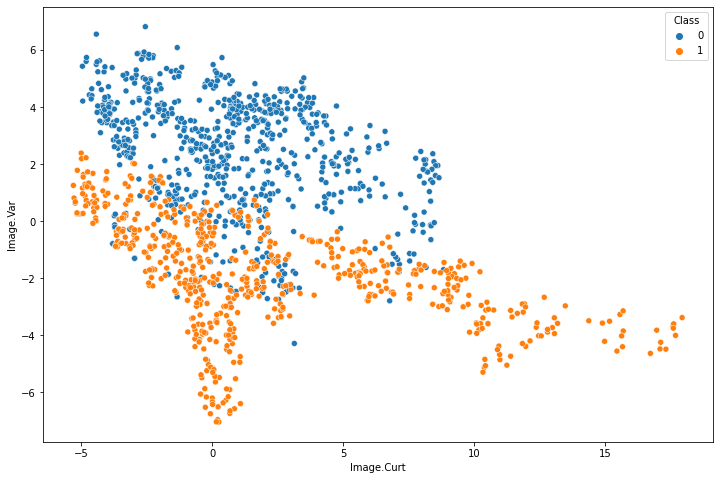

In [5]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data=bank_note_data, y='Image.Var', x='Image.Curt', hue='Class')

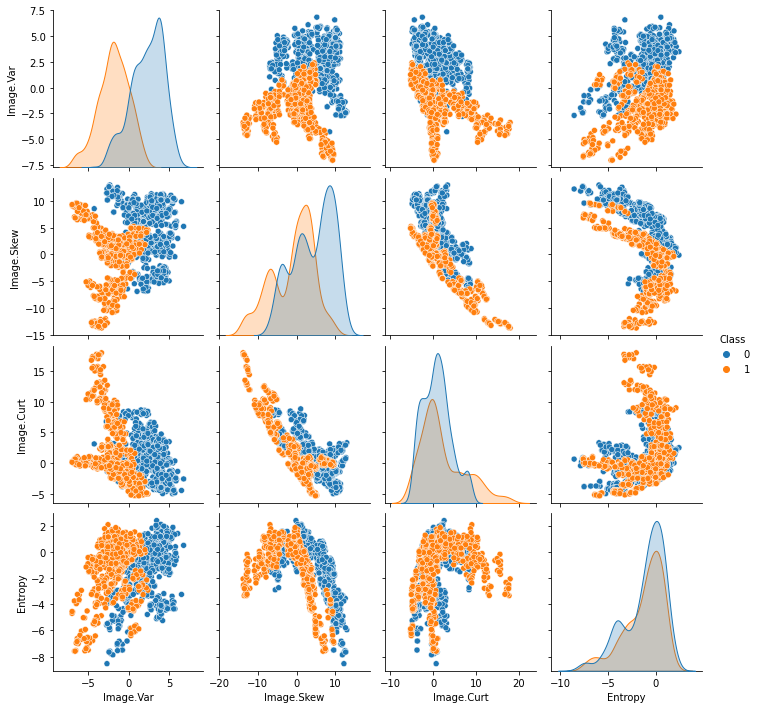

In [6]:
sns.pairplot(data = bank_note_data, hue='Class')

### Q2:  Before you get into the modeling, just think for a moment looking at the scatter plot: 

How accurate do we expect this model to be?  Where are the decision boundaries likely to be, where do we expect to see errors or other features?

### Q3:  Set up the X and y variables for your model and then divide them into a testing/training sets.

In [9]:
X = np.array(bank_note_data.loc[:, ['Image.Curt', 'Image.Var'] ])
y = np.array(bank_note_data.loc[:, 'Class'])

# Make the training and testing sets

# we will choose the size of our testing set to be 20% of the data we have
n = X.shape[0]
test = int(0.20*n)

# choose a random shuffling of the data and apply it to both the inputs and the output.
perm = permutation(n)
X = X[perm]
y = y[perm]

# Build the testing and training sets
X_test = X[:test]
y_test = y[:test]

X_train = X[test:]
y_train = y[test:]

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Training Score: 0.9061930783242259
Testing Score: 0.9197080291970803


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


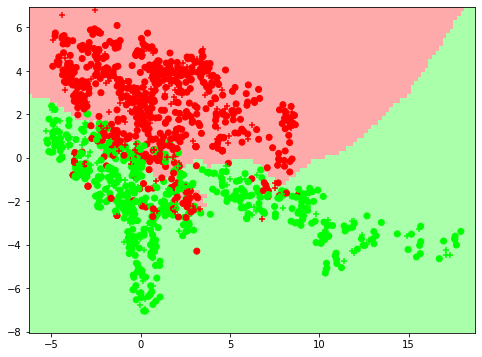

In [36]:
clf = KNeighborsClassifier(n_neighbors=25)
clf.fit(X_train, y_train)
plot_cat_model(clf, X_train, y_train, X_test, y_test)

In [58]:
X = np.array(bank_note_data.loc[:, ['Image.Curt', 'Image.Skew', 'Entropy', 'Image.Var'] ])
y = np.array(bank_note_data.loc[:, 'Class'])

# Make the training and testing sets

# we will choose the size of our testing set to be 20% of the data we have
n = X.shape[0]
test = int(0.20*n)

# choose a random shuffling of the data and apply it to both the inputs and the output.
perm = permutation(n)
X = X[perm]
y = y[perm]

# Build the testing and training sets
X_test = X[:test]
y_test = y[:test]

X_train = X[test:]
y_train = y[test:]

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.tree import export_graphviz

In [61]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9653916211293261, 0.9379562043795621)

In [62]:
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=['Curt', 'Skew', 'Entropy', 'Var'],  
                     class_names=['Not Counterfeit', 'Counterfeit'],  
                     filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph 

ValueError: Length of feature_names, 2 does not match number of features, 4

### Q4:  Use Crossvalidation or Bootstrapping to determine the best number of neighbors for a K-Nearest Neighbors Classifier

You might want to also do individual plots, and you can do that using the plotting function below.

### Q5: Once you have determined on the best choice for the number of neighbors, train your final model on the entire training set and then plot it with the original testing set.

I will put the function for plotting the results here. Note that I had to reduce the number of colors from 3 to 2. You might need to adjust the offsets for xx_min, xx_max, yy_min, and yy_max as they were chosen below for the penguin problem.

In [13]:
# We need a function to display the results
# I am defining it here. Note that this assumes we only have two features for our inputs.

# Note I am not going to ask you to write functions like this

def plot_cat_model(clf, X_train, y_train, X_test, y_test):
    
    h = 0.2 # Mesh Size
    
    # Make a mesh and then plot the decision boundary. To do that we assign a 
    # color to teach point in the mesh.
    # This tries to gets the boundaries for the box to draw. You may have to adjust 
    # this min and max values in some cases.
    xx_min, xx_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    yy_min, yy_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    
    xx, yy = np.meshgrid(np.arange(xx_min, xx_max, h), 
                        np.arange(yy_min, yy_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # you can adjust the output figure size here
    plt.figure(figsize=(8, 6))
    
    # define the colors - note we need a color for each answer in our output
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    
    # plot the classification
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # plot the training set
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, marker='o')
    
    # plot the testing set
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+')
    
    # Print out the score results for the classifier also
    print('Training Score: {}'.format(clf.score(X_train, y_train)))
    print('Testing Score: {}'.format(clf.score(X_test, y_test)))